In [34]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import KFold, cross_val_predict, train_test_split
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
from scipy.signal import savgol_filter
import numpy as np
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import seaborn as sns # plotting

In [36]:
#For mean spectra for each sample
import os

features = np.empty([1,241])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/C'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
        #print(os.path.join(directory, filename))
      arr = np.load(os.path.join(directory, filename))
      arr_2d = np.reshape(arr, (1, 241))  
      #arr_2d = savgol_filter(arr_2d, 17, polyorder=2, deriv=2)  
      features  = np.append(features,arr_2d , axis=0) 
      print(filename)
    else:
        continue

features = features[1:,:]
features.shape


GC04_00C_1.np.npy
GC04_00C_2.np.npy
GC04_00C_3.np.npy
GC05_00C_1.np.npy
GC05_00C_2.np.npy
GC05_00C_3.np.npy
GC06_00C_1.np.npy
GC06_00C_2.np.npy
GC06_00C_3.np.npy
GC07_00C_1.np.npy
GC07_00C_2.np.npy
GC07_00C_3.np.npy
GC08_00C_1.np.npy
GC08_00C_2.np.npy
GC08_00C_3.np.npy
GC09_00C_1.np.npy
GC09_00C_2.np.npy
GC09_00C_3.np.npy
GC10_00C_1.np.npy
GC10_00C_2.np.npy
GC10_00C_3.np.npy
GC11_00C_1.np.npy
GC11_00C_2.np.npy
GC11_00C_3.np.npy
GC12_00C_1.np.npy
GC12_00C_2.np.npy
GC12_00C_3.np.npy
GC13_00C_1.np.npy
GC13_00C_2.np.npy
GC13_00C_3.np.npy
GI11_00C_1.np.npy
GI11_00C_2.np.npy
GI11_00C_3.np.npy
GI13_00C_1.np.npy
GI13_00C_2.np.npy
GI13_00C_3.np.npy


(36, 241)

In [3]:
def msc(input_data):
    ''' Perform Multiplicative scatter correction'''
 
     #mean centre correction
    for i in range(input_data.shape[0]):
        input_data[i,:] -= input_data[i,:].mean()
 
     #Get the reference spectrum. If not given, estimate it from the mean    
      
        # Calculate mean
    ref = np.mean(input_data, axis=0)
    
 
    # Define a new array and populate it with the corrected data    
    data_msc = np.zeros_like(input_data)
    for i in range(input_data.shape[0]):
        # Run regression
        fit = np.polyfit(ref, input_data[i,:], 1, full=True)
        # Apply correction
        data_msc[i,:] = (input_data[i,:] - fit[0][1]) / fit[0][0] 
 
    return (data_msc)

In [4]:
features = msc(features)
features.shape

(23, 241)

In [5]:
from numpy import savetxt
savetxt('data.csv', features, delimiter=',')

In [6]:
features = savgol_filter(features, 15, polyorder=3, deriv=1)

In [37]:
from numpy import genfromtxt
y = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/C/LabelsSSC.csv', delimiter=',')
#labels = np.load('C:/Users/nekra/OneDrive/Desktop/PhD UKY/Data analysis/HSI/NIR/Labels.npy') # Control and infested were marked by 0, 1
y.shape



(36,)

In [38]:
bands = np.genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/bands.csv', delimiter=',')
bands = bands[1:,0]
bands.shape

(241,)

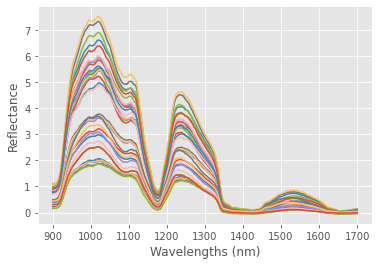

In [39]:
with plt.style.context('ggplot'):
    plt.plot(bands, features.T)
    plt.xlabel("Wavelengths (nm)")
    plt.ylabel("Reflectance")

In [52]:
#For mean spectra for each sample in test dataset
import os

features2 = np.empty([1,241])
directory = 'C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/C/test'
for filename in os.listdir(directory):
    if filename.endswith(".npy"): 
        #print(os.path.join(directory, filename))
      arr = np.load(os.path.join(directory, filename))
      arr_2d = np.reshape(arr, (1, 241))  
      arr_2d = savgol_filter(arr_2d, 31, 2) 
      features2  = np.append(features2, arr_2d, axis=0) 
      print(filename)
    else:
        continue

features2 = features2[1:,:]
features2.shape


GI14_00C_1.np.npy
GI14_00C_2.np.npy
GI14_00C_3.np.npy
GI15_00C_1.np.npy
GI15_00C_2.np.npy
GI15_00C_3.np.npy
GI19_00C_1.np.npy
GI19_00C_2.np.npy
GI19_00C_3.np.npy
GI21_00C_1.np.npy
GI21_00C_2.np.npy
GI21_00C_3.np.npy


(12, 241)

In [53]:
features2 = msc(features2)
features2.shape

(12, 241)

In [40]:
#optimisation of the PLS regression on train data set to get the best n_components
def optimise_pls_cv(X, y, n_comp):
    # Define PLS object
    pls = PLSRegression(n_components=n_comp)

    # Cross-validation
    y_cv = cross_val_predict(pls, X, y, cv=10)

    # Calculate scores
    r2 = r2_score(y, y_cv)
    mse = mean_squared_error(y, y_cv)
    rpd = y.std()/np.sqrt(mse)
    
    return (y_cv, r2, mse, rpd)

In [41]:
# test with 40 components
r2s = []
mses = []
rpds = []
xticks = np.arange(1, 41)
for n_comp in xticks:
    y_cv, r2, mse, rpd = optimise_pls_cv(features, y, n_comp)
    r2s.append(r2)
    mses.append(mse)
    rpds.append(rpd)

C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-

C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 31
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 32
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 32
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-packages\sklearn\cross_decomposition\_pls.py:323: UserWarning: Y residual constant at iteration 32
  warnings.warn('Y residual constant at iteration %s' % k)
C:\Users\nek222\Anaconda3\lib\site-

In [42]:
# Plot the mses
def plot_metrics(vals, ylabel, objective):
    with plt.style.context('ggplot'):
        plt.plot(xticks, np.array(vals), '-v', color='blue', mfc='blue')
        if objective=='min':
            idx = np.argmin(vals)
        else:
            idx = np.argmax(vals)
        plt.plot(xticks[idx], np.array(vals)[idx], 'P', ms=10, mfc='red')

        plt.xlabel('Number of PLS components')
        plt.xticks = xticks
        plt.ylabel(ylabel)
        plt.title('PLS')

    plt.show()

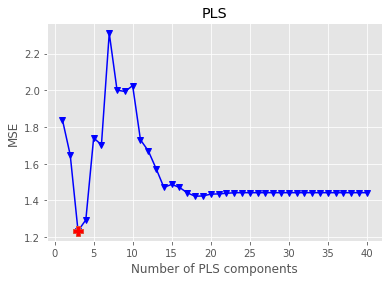

In [43]:
plot_metrics(mses, 'MSE', 'min')

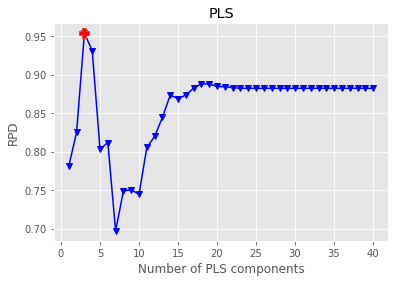

In [44]:
plot_metrics(rpds, 'RPD', 'max')

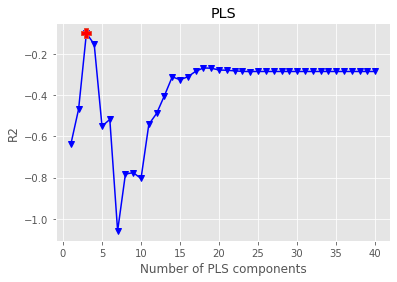

In [45]:
plot_metrics(r2s, 'R2', 'max')

In [46]:
#Outliers detection
# Define PLS object
pls = PLSRegression(n_components=5)
# Fit data
pls.fit(features, y)
 
# Get X scores
T = pls.x_scores_
# Get X loadings
P = pls.x_loadings_
 
# Calculate error array
Err = features - np.dot(T,P.T)
 
# Calculate Q-residuals (sum over the rows of the error array)
Q = np.sum(Err**2, axis=1)
 
# Calculate Hotelling's T-squared (note that data are normalised by default)
Tsq = np.sum((pls.x_scores_/np.std(pls.x_scores_, axis=0))**2, axis=1)

In [48]:
# Test-train split
X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=123)
#X_train = features
#y_train = y
#X_test  = features2
#y_test  = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/test/labelsSSC.csv', delimiter=',')

# Define the PLS object

pls = PLSRegression(n_components=3)
# Fit the training set
pls.fit(X_train, y_train)
# Predictions: these won't generally be integer numbers
y_pred1 = pls.predict(X_train)
y_pred2 = pls.predict(X_test)
y_pred1 = np.reshape(y_pred1, (y_train.shape[0],))
y_pred2 = np.reshape(y_pred2, (y_test.shape[0],))
r1 = np.corrcoef(y_pred1, y_train)
r2 = np.corrcoef(y_pred2, y_test)
print(r1)
print(r2)
score = r2_score(y_test, y_pred2)
#mse = mean_squared_error(y_train, y_pred,squared=False)
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred1,squared=False))
    #print(score)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2,squared=False))
print(rmse1)
print(rmse2)
print(score)
 

[[1.         0.63136058]
 [0.63136058 1.        ]]
[[1.         0.78499032]
 [0.78499032 1.        ]]
0.8901671175849049
0.8806971296895167
0.5671957433446562


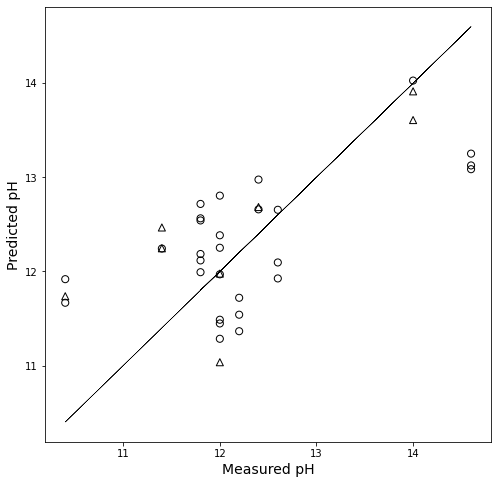

In [49]:
plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.set_facecolor("white")
with plt.style.context('ggplot'):
    plt.scatter(y_train, y_pred1, linewidths = 1, color='none', edgecolor ="black", s = 50)
    plt.scatter(y_test, y_pred2, c ="none",linewidths = 1, marker ="^", edgecolor ="black",s = 50)
    plt.plot(y_train, y_train, 'black', label='Expected regression line', linewidth=.3)
    #plt.xlim(20,  51)
    #plt.ylim(20, 51)
    #z = np.polyfit(y_train, y_pred1, 1)
    #plt.plot(np.polyval(z, y_train), y_test, color='blue', label='Predicted regression line')
    plt.xlabel('Measured pH', fontsize=14)
    plt.ylabel('Predicted pH', fontsize=14)
    #plt.legend()
    plt.savefig('regg.png', dpi=300) # save figuer with resolution of 300 dpi

In [56]:
# Test-train split
#X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.3, random_state=123)
# Define the PLS object
X_train = features
y_train = y
X_test  = features2
y_test  = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/C/test/labelsSSC.csv', delimiter=',')

lin_reg_mod = LinearRegression()
lin_reg_mod.fit(X_train, y_train)
pred = lin_reg_mod.predict(X_test)
r = np.corrcoef(y_test, pred)
print(r)
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))

test_set_r2 = r2_score(y_test, pred)
print('R2: %.3f'%test_set_r2)
print('test_set_rmse: %.3f'%test_set_rmse)


[[1.         0.26707035]
 [0.26707035 1.        ]]
R2: -147.235
test_set_rmse: 17.432


In [58]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn
from sklearn.metrics import classification_report
pca = PCA(n_components=10) # let's only consider the first two PCs
pca_results = pca.fit_transform(features) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results.shape)
pca_scores = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(36, 10)
variance explained by the first two PCs: 99.47%, 0.27%


In [59]:
from sklearn.decomposition import PCA # import PCA class from scikit-learn
from sklearn.metrics import classification_report
pca = PCA(n_components=10) # let's only consider the first two PCs
pca_results2 = pca.fit_transform(features2) # Fit the model with input and apply the dimensionality reduction on it.
print(pca_results2.shape)
pca_scores2 = pca.explained_variance_ratio_ # variance explained by each component
print('variance explained by the first two PCs: {:.2%}, {:.2%}'.format(*pca_scores))

(12, 10)
variance explained by the first two PCs: 99.47%, 0.27%


In [60]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

X_train, X_test, y_train, y_test = train_test_split(features, y, test_size=0.2, random_state=123)
#X_train = features
#y_train = y
#X_test  = features2
#y_test  = genfromtxt('C:/Users/nek222/Desktop/PhD UKY/Data analysis/HSI/Mean spectra of box ROI NIR Gala SIDE view/Pixels 10by10/0C/test/labelspH.csv', delimiter=',')
regr = SVR(C=20, epsilon=0.002)
regr.fit(X_train, y_train)
pred = regr.predict(X_train)

y_pred1 = regr.predict(X_train)
y_pred2 = regr.predict(X_test)
y_pred1 = np.reshape(y_pred1, (y_train.shape[0],))
y_pred2 = np.reshape(y_pred2, (y_test.shape[0],))
r1 = np.corrcoef(y_pred1, y_train)
r2 = np.corrcoef(y_pred2, y_test)
print(r1)
print(r2)
    #score = r2_score(y_test, y_pred)
#mse = mean_squared_error(y_train, y_pred,squared=False)
rmse1 = np.sqrt(mean_squared_error(y_train, y_pred1,squared=False))
    #print(score)
rmse2 = np.sqrt(mean_squared_error(y_test, y_pred2,squared=False))
print(rmse1)
print(rmse2)
    #print(y_pred)

[[1.         0.79584215]
 [0.79584215 1.        ]]
[[1.         0.71773467]
 [0.71773467 1.        ]]
0.9367420402259122
1.0095765619004387


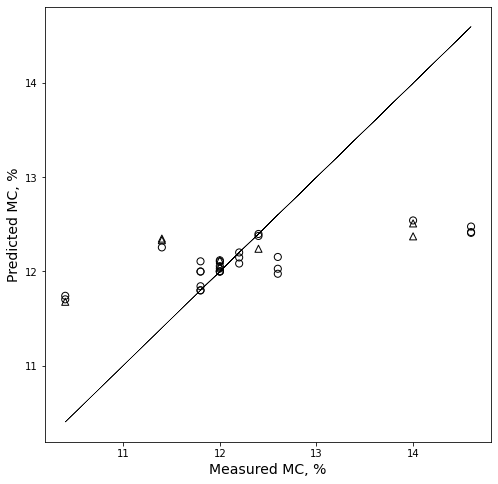

In [61]:
plt.figure(figsize=(8, 8))
ax = plt.axes()
ax.set_facecolor("white")
with plt.style.context('ggplot'):
    plt.scatter(y_train, y_pred1, linewidths = 1, color='none', edgecolor ="black", s = 50)
    #plt.scatter(y_test, y_pred2, color='blue')
    plt.scatter(y_test, y_pred2, c ="none",linewidths = 1, marker ="^", edgecolor ="black",s = 50)
    plt.plot(y_train, y_train, 'black', label='Expected regression line', linewidth=.3)
    #plt.xlim(82,  90)
    #plt.ylim(82, 90)
    #z = np.polyfit(y_train, y_pred1, 1)
    #plt.plot(np.polyval(z, y_train), y_test, color='blue', label='Predicted regression line')
    plt.xlabel('Measured MC, %', fontsize=14)
    plt.ylabel('Predicted MC, %', fontsize=14)
    #plt.legend()
    plt.savefig('regg.png', dpi=300) # save figuer with resolution of 300 dpi